In [7]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

In [8]:
tickers = ['PG', 'MSFT', 'F', 'GE']
mydata = pd.DataFrame()
for t in tickers:
    mydata[t] = wb.DataReader(t, data_source='yahoo', start='1995-1-1')['Adj Close']

In [9]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6383 entries, 1995-01-03 to 2020-05-08
Data columns (total 4 columns):
PG      6383 non-null float64
MSFT    6383 non-null float64
F       6383 non-null float64
GE      6383 non-null float64
dtypes: float64(4)
memory usage: 249.3 KB


In [6]:
mydata.head()

,PG,MSFT,F,GE
Date,,,,
1995-01-03,8.313478,2.413537,3.256691,2.729230
1995-01-04,8.246841,2.431082,3.344314,2.729230
1995-01-05,8.130219,2.390982,3.315107,2.735919
1995-01-06,8.146880,2.431082,3.315107,2.722540
1995-01-09,8.113561,2.416045,3.373522,2.695783


In [7]:
mydata.tail()

,PG,MSFT,F,GE
Date,,,,
2020-05-04,115.769997,178.839996,4.86,6.21
2020-05-05,116.010002,180.759995,4.97,6.20
2020-05-06,113.099998,182.539993,4.87,5.98
2020-05-07,112.169998,183.600006,4.87,6.11
2020-05-08,115.949997,184.679993,5.24,6.29


In [8]:
mydata.iloc[0]

PG      8.313478
MSFT    2.413537
F       3.256691
GE      2.729230
Name: 1995-01-03 00:00:00, dtype: float64

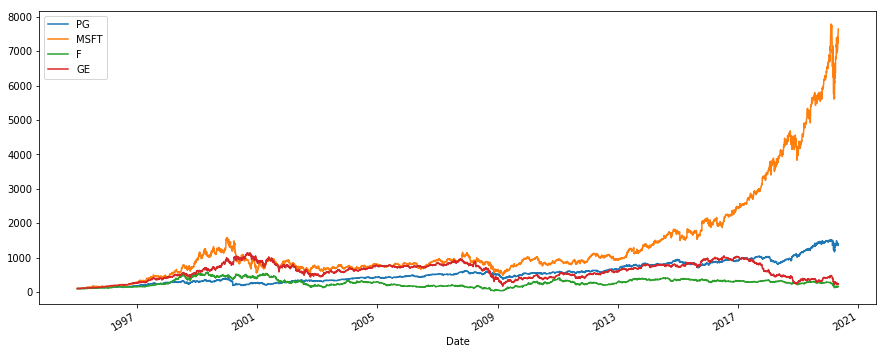

In [9]:
(mydata/mydata.iloc[0] * 100).plot(figsize=(15,6))
plt.show()

<function matplotlib.pyplot.show>

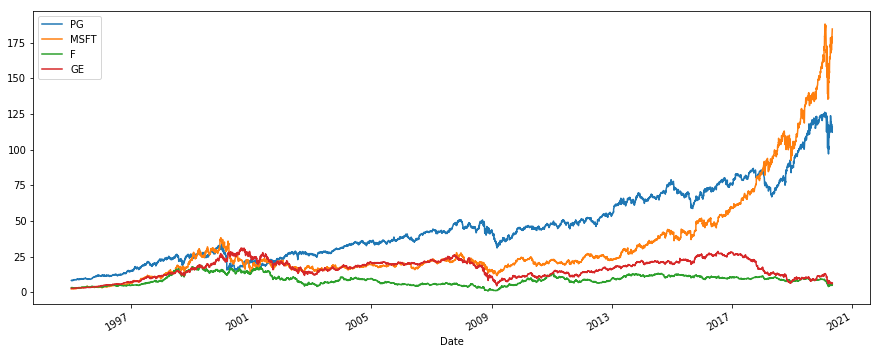

In [10]:
mydata.plot(figsize=(15,6))
plt.show

In [10]:
returns = (mydata / mydata.shift(1)) - 1
returns.head()

,PG,MSFT,F,GE
Date,,,,
1995-01-03,NaN,NaN,NaN,NaN
1995-01-04,-0.008016,0.007269,0.026905,0.000000
1995-01-05,-0.014142,-0.016495,-0.008734,0.002451
1995-01-06,0.002049,0.016771,0.000000,-0.004890
1995-01-09,-0.004090,-0.006185,0.017621,-0.009828


In [11]:
weights= np.array([0.25,0.25,0.25,0.25])

In [12]:
np.dot(returns, weights)

array([        nan,  0.00653965, -0.00922985, ..., -0.01771033,
        0.00483084,  0.03625408])

In [14]:
annual_returns=returns.mean()*250
annual_returns

PG      0.139971
MSFT    0.220084
F       0.087960
GE      0.082159
dtype: float64

In [15]:
np.dot(annual_returns, weights)

0.13254340198744885

In [18]:
pfolio_1 = str(round(np.dot(annual_returns, weights),5)*100) + ' %'
print pfolio_1

13.254 %


In [19]:
weights_2 = np.array([0.4, 0.4, 0.15, 0.05])

In [23]:
pfolio_2 = str(round(np.dot(annual_returns, weights_2),5) * 100) + ' %'
print pfolio_1
print pfolio_2

13.254 %
16.132 %
